# Red neuronal desde Cero

In [1]:
%config IPCompleter.greedy=True

In [2]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

(500, 1)


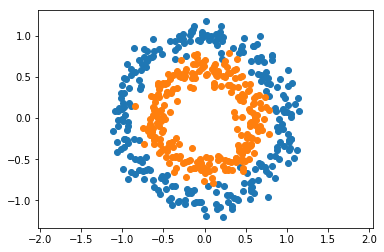

In [3]:
#CREAR EL DATASET
n = 500  #num de individuos
p = 2    #num de features

X,Y = make_circles(n,factor=0.6,noise=0.1) 
#X es la matriz de datos donde cada renglon es un individuo y cada columna es una coordenada.
#Y es un arreglo unidimensional que indica a qué categoría pertenece cada individuo de X.
Y = Y[:,np.newaxis]
print(Y.shape)

plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1])
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1])
plt.axis("equal")
plt.show()


In [ ]:
#CLASE: CAPA DE LA RED

class capa():
    
    def __init__(self, num_conec, num_neuro, f_act): 
        
        self.f_act = f_act
        self.b = np.random.rand(1,num_neuro)     *2 - 1
        self.w = np.random.rand(num_conec,num_neuro)*2 - 1
        self.num_conec = num_conec
        self.num_neuro = num_neuro

In [ ]:
#FUNCIONES DE ACTIVACION
 
sigmoide = (lambda x: 1/(1+np.e**(-x)),
            lambda x: np.e**(-x) /(1+np.e**(-x))**2)

_x = np.linspace(-5,5,100)
plt.plot(_x,sigmoide[0](_x),c="red")
plt.plot(_x,sigmoide[1](_x),c="blue")

In [ ]:
# CREAR ESQUELETO DE LA RED

#capa(num_conec,num_neuro,f_act)

capa1 = capa(p,4,sigmoide)
capa2 = capa(4,8,sigmoide)
#...

#Para automatizar la creacion de todas las capas, en vez de hacerlas una por una:

def crear_red(topo_red,f_act):
    red = []
    for i, num_neuro in enumerate(topo_red[:-1]):
        red.append(capa(topo_red[i],topo_red[i+1],f_act))
    
    return red

In [ ]:
# FUNCION DE COSTO
f_costo = (lambda Yp,Yr: np.mean((Yp-Yr)**2),  #Establezco una funcion de costo para la red
           lambda Yp,Yr: (Yp-Yr) )

In [ ]:
# PROCESO DE ENTRENAMIENTO DE LA RED

def entrenar(red_neuronal,X,Y,f_costo, lr=0.5,train=True):
    
    out = [(None,X)] #lista de parejas(z,a) para cada capa
    
    #FORWARD PASS
    for l, layer in enumerate(red_neuronal):
        
        z = out[-1][1] @ red_neuronal[l].w + red_neuronal[l].b #me devuelve una matriz de n x num_neuro(z's) = 
                                                               #valor de las z's para cada individuo(500)
        a = red_neuronal[l].f_act[0](z) #aplico funcion de activacion a la matriz z anterior
        
        out.append((z,a))
        
    #print(out[-1][1]) #me imprime el valor obtenido al final de la red f(z) para cada individuo (X)
    #print(f_costo[0](out[-1][1],Y)) #me imprime el valor de la funcion de costo terminando de recorrer la red
                                    #ECM de los valores obtenidos al final de la red y 
    #BACKWARD PASS
    if train :
        deltas = []
        for l in reversed(range(0,len(red_neuronal))):
            z = out[l+1][0]
            a = out[l+1][1]
            
            if  l == len(red_neuronal)-1:
                deltas.insert(0,f_costo[1](a,Y)*red_neuronal[l].f_act[1](z))#inserta en la primera posicion un vector de 500x1
            
            else:
                deltas.insert(0,deltas[0] @ _W.T * red_neuronal[l].f_act[1](z))
             
        #GRADIENT DECENT        
            _W = red_neuronal[l].w
            
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0],axis=0,keepdims=True) * lr
            red_neuronal[l].w = red_neuronal[l].w - out[l][1].T @ deltas[0] * lr
            
             
    return out[-1][1]  #Prediccion final de la red  para los n individuos

In [ ]:
#Entreno red y muestro gráficamente el avance de la clasificacion
import time
from IPython.display import clear_output

topology = [p,4,8,1]  #num de neuronas que quiero en cada capa de mi red
mi_red = crear_red(topology,sigmoide)     #Creo red

loss = []

for i in range(2500):   #Cuantas veces quiero entrenar mi red
    
    yp = entrenar(mi_red,X,Y,f_costo,lr=0.05) 
    
    if i % 50 == 0:
        loss.append(f_costo[0](yp,Y))
        
        res=50
        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)
        _Y = np.zeros((res,res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0,i1] = entrenar(mi_red,np.array([[x0,x1]]),Y,f_costo,train=False)[0][0]  #Prediccion en el area [-1.5,1.5] x [-1.5,1.5]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")     #Esto colorea el mapa _Y de predicciones
        plt.axis("equal")
        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss) #Gráfica de los costos obtenidos(cada 25 iteraciones) hasta el momento
        plt.title("Funcion de costo cada 25 iteraciones")
        plt.show()
        time.sleep(0.1) #detiene durante una fraccion de segundo el programa para poder visualizar la ultima gráfica obtenida
    


In [ ]:
#Test
X_prima,Y_prima = make_circles(1000,factor=0.6,noise=0.1) 
Y_prima = Y_prima[:,np.newaxis]

In [ ]:
prueba = entrenar(mi_red,X_prima,Y,f_costo,lr=0.5,train=False)

In [ ]:
resultado = np.where(prueba<0.5,0,1)

In [ ]:
(resultado == Y_prima).ravel().tolist().count(True) #Aciertos